In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np

from IPython.display import Image

import lipswish_vs_lipmish_illustration

from flow_comparison_utils import *
from graph.belief_network import *
from data.load_data import load_protein, load_mehra, load_dataset

In [3]:
device = "cpu" if not(torch.cuda.is_available()) else "cuda:0"
print(device)

cuda:0


# LipMish vs LipSwish

$$
\textrm{LipMish}(x) = \frac{1}{1.088} \cdot x \cdot \tanh(\textrm{softplus}(\beta \cdot x)) ,\quad \textrm{where} \quad \beta > 0
$$

$$
\textrm{LipSwish}(x) = \frac{1}{1.1} \cdot x \cdot \textrm{sigmoid}(\beta \cdot x) , \quad \textrm{where} \quad \beta > 0
$$

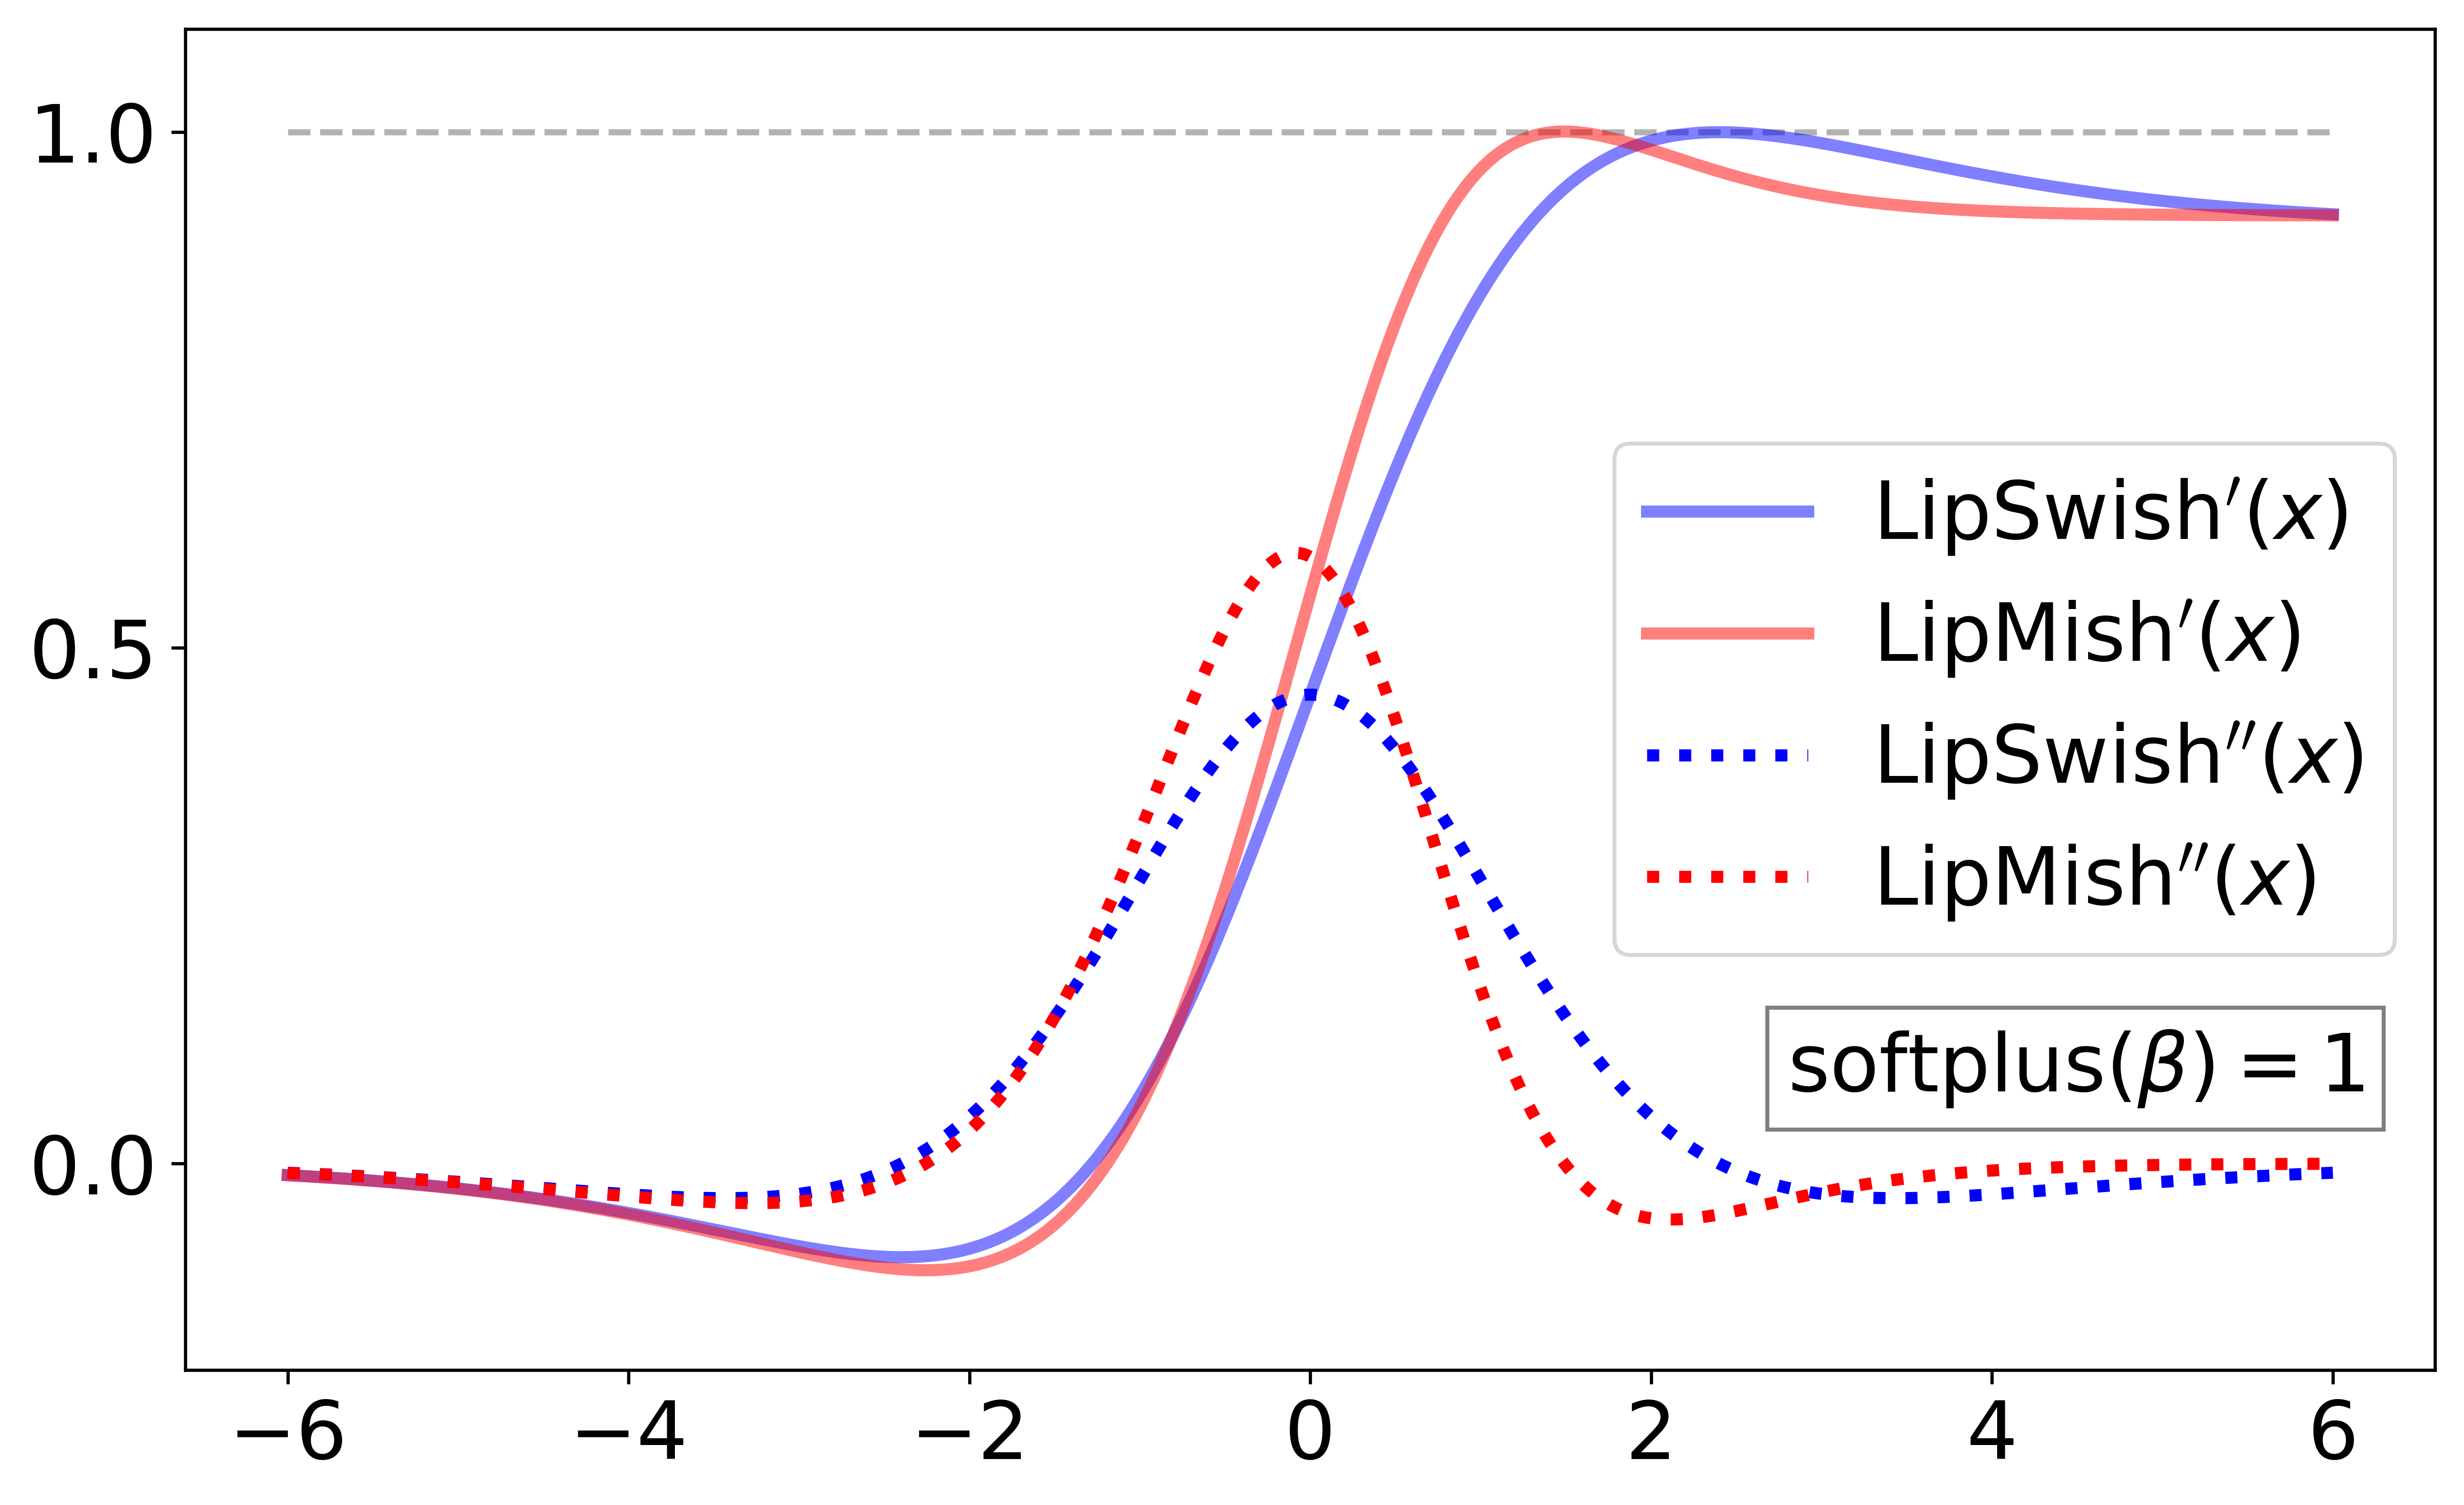

In [4]:
Image(filename='./experiment_logs/figures/lipmish_vs_lipswish/lipswish-vs-lipmish.png', width=500) 

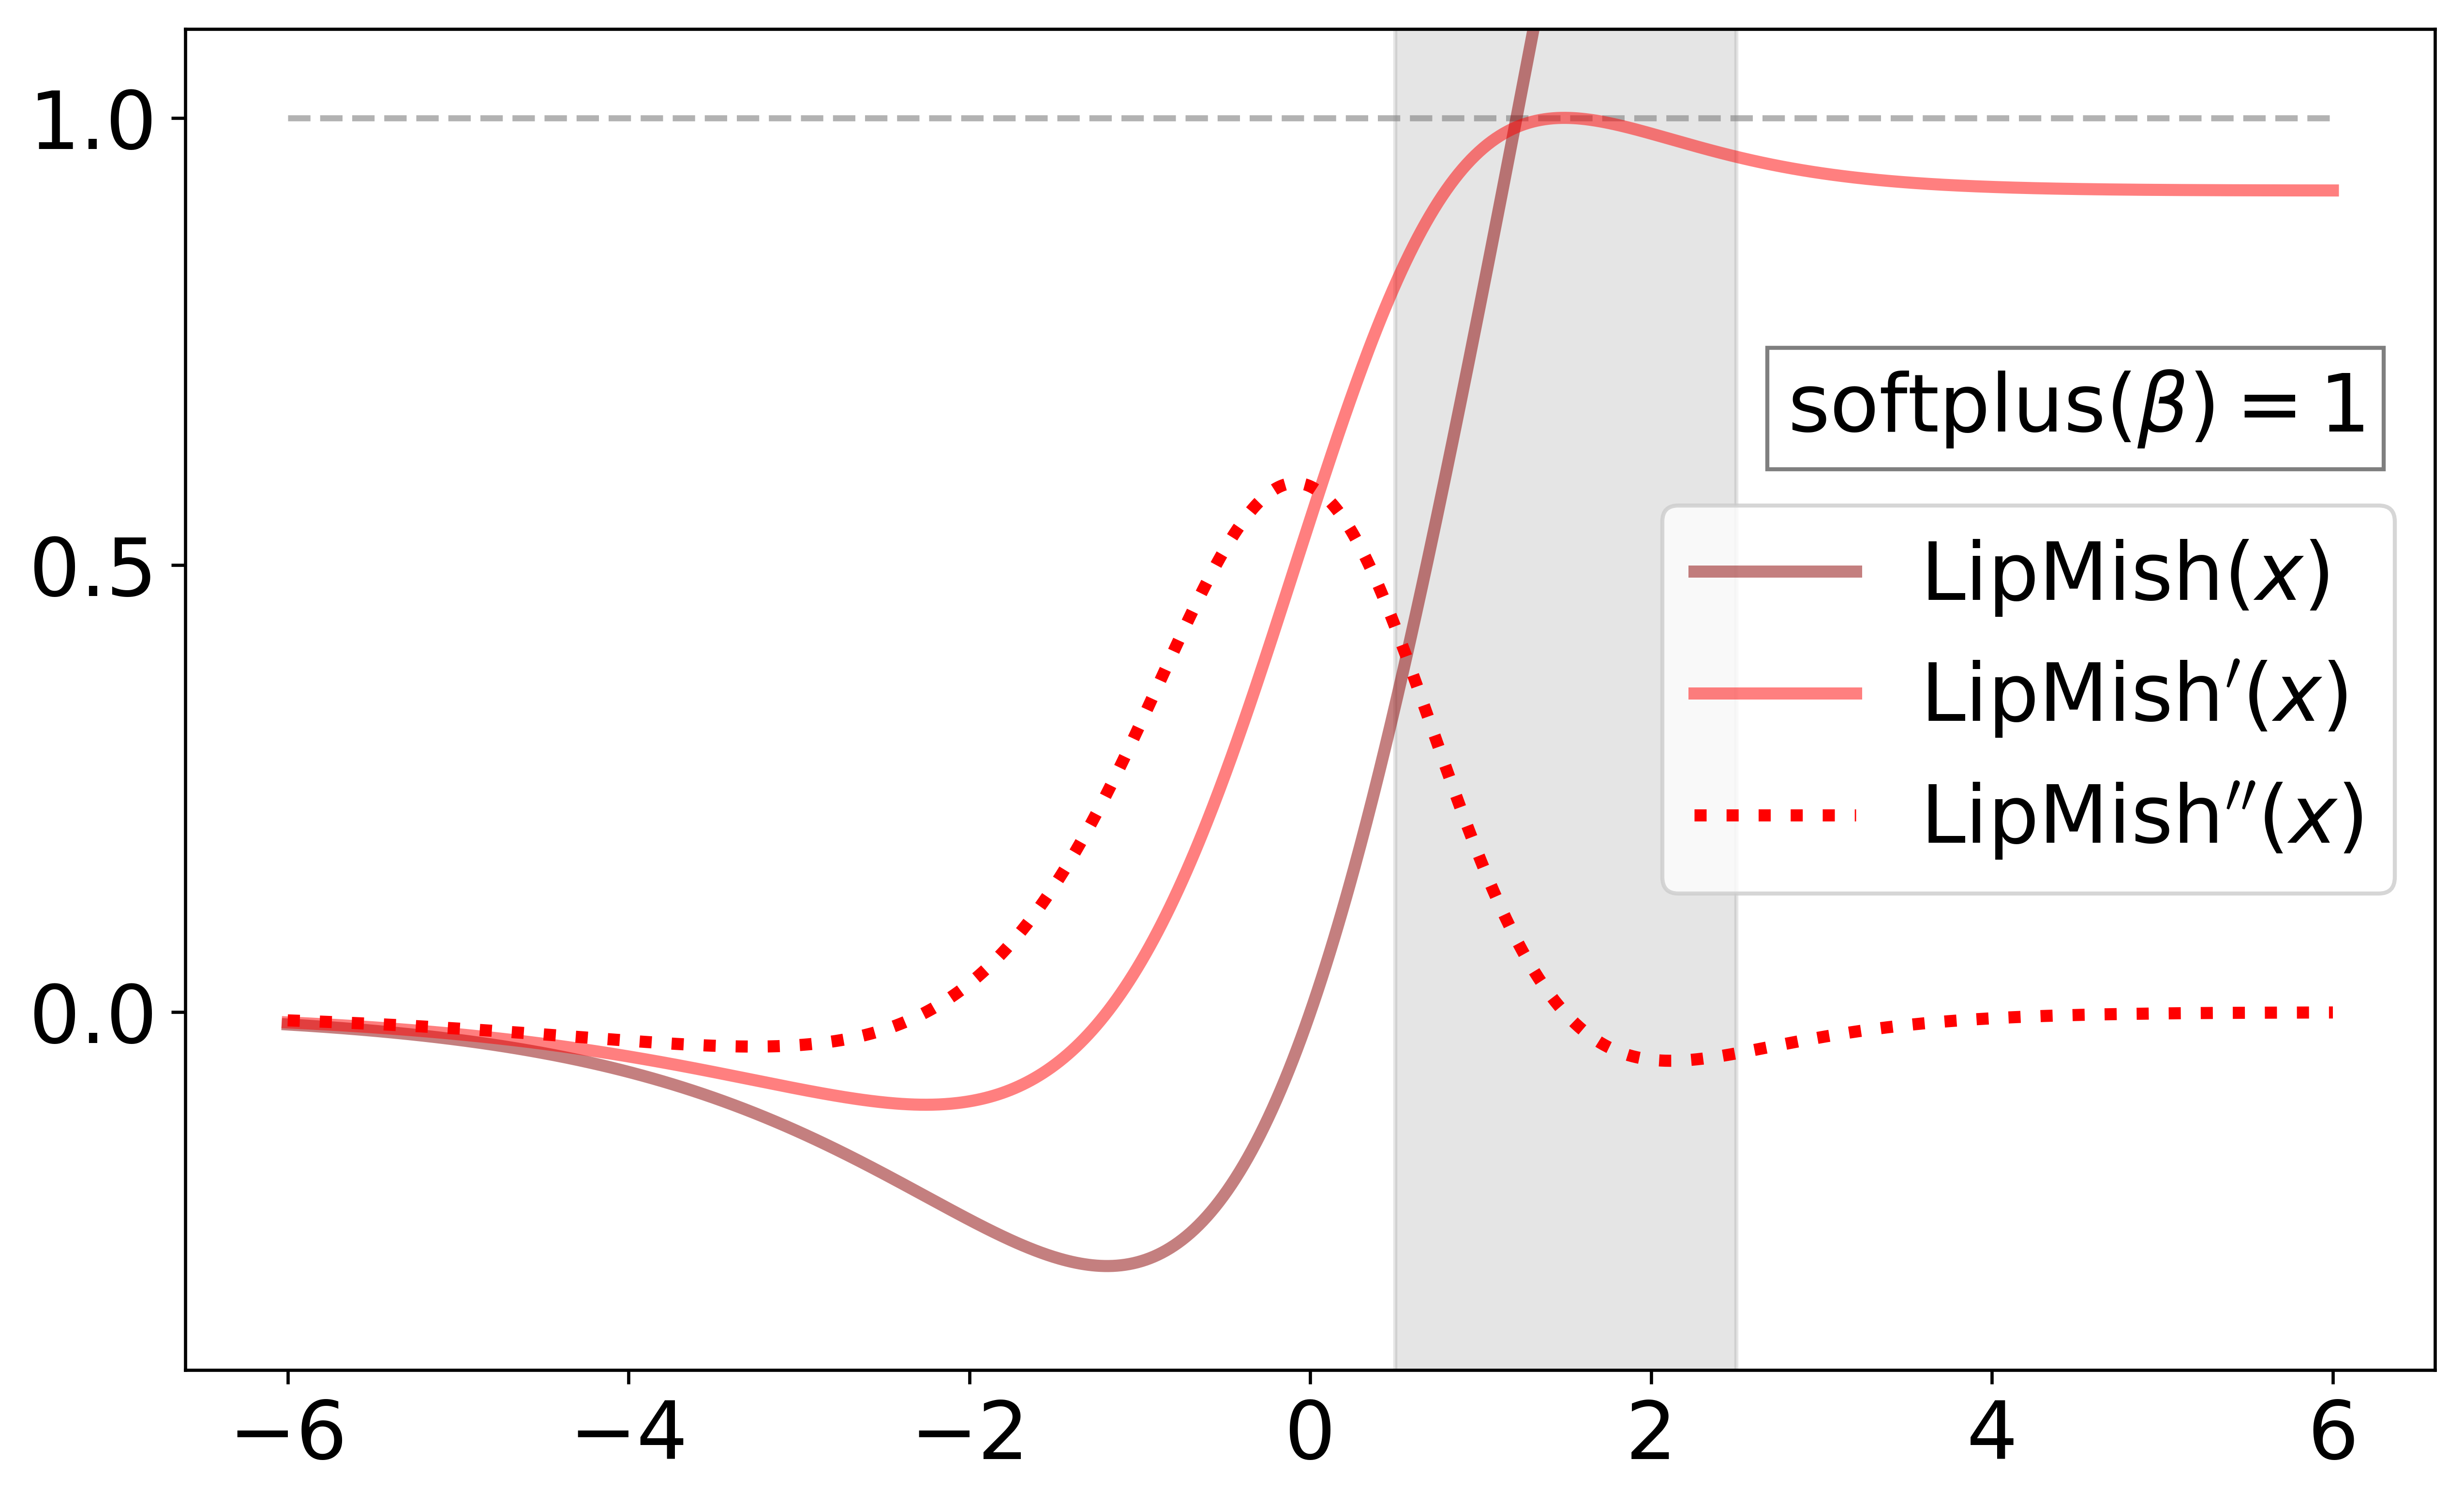

In [5]:
Image(filename='./experiment_logs/figures/lipmish_vs_lipswish/lipmish_derivatives.png', width=500) 

### Deriving 1.088

Find root of second derivative corresponding to maximum value of first derivative.

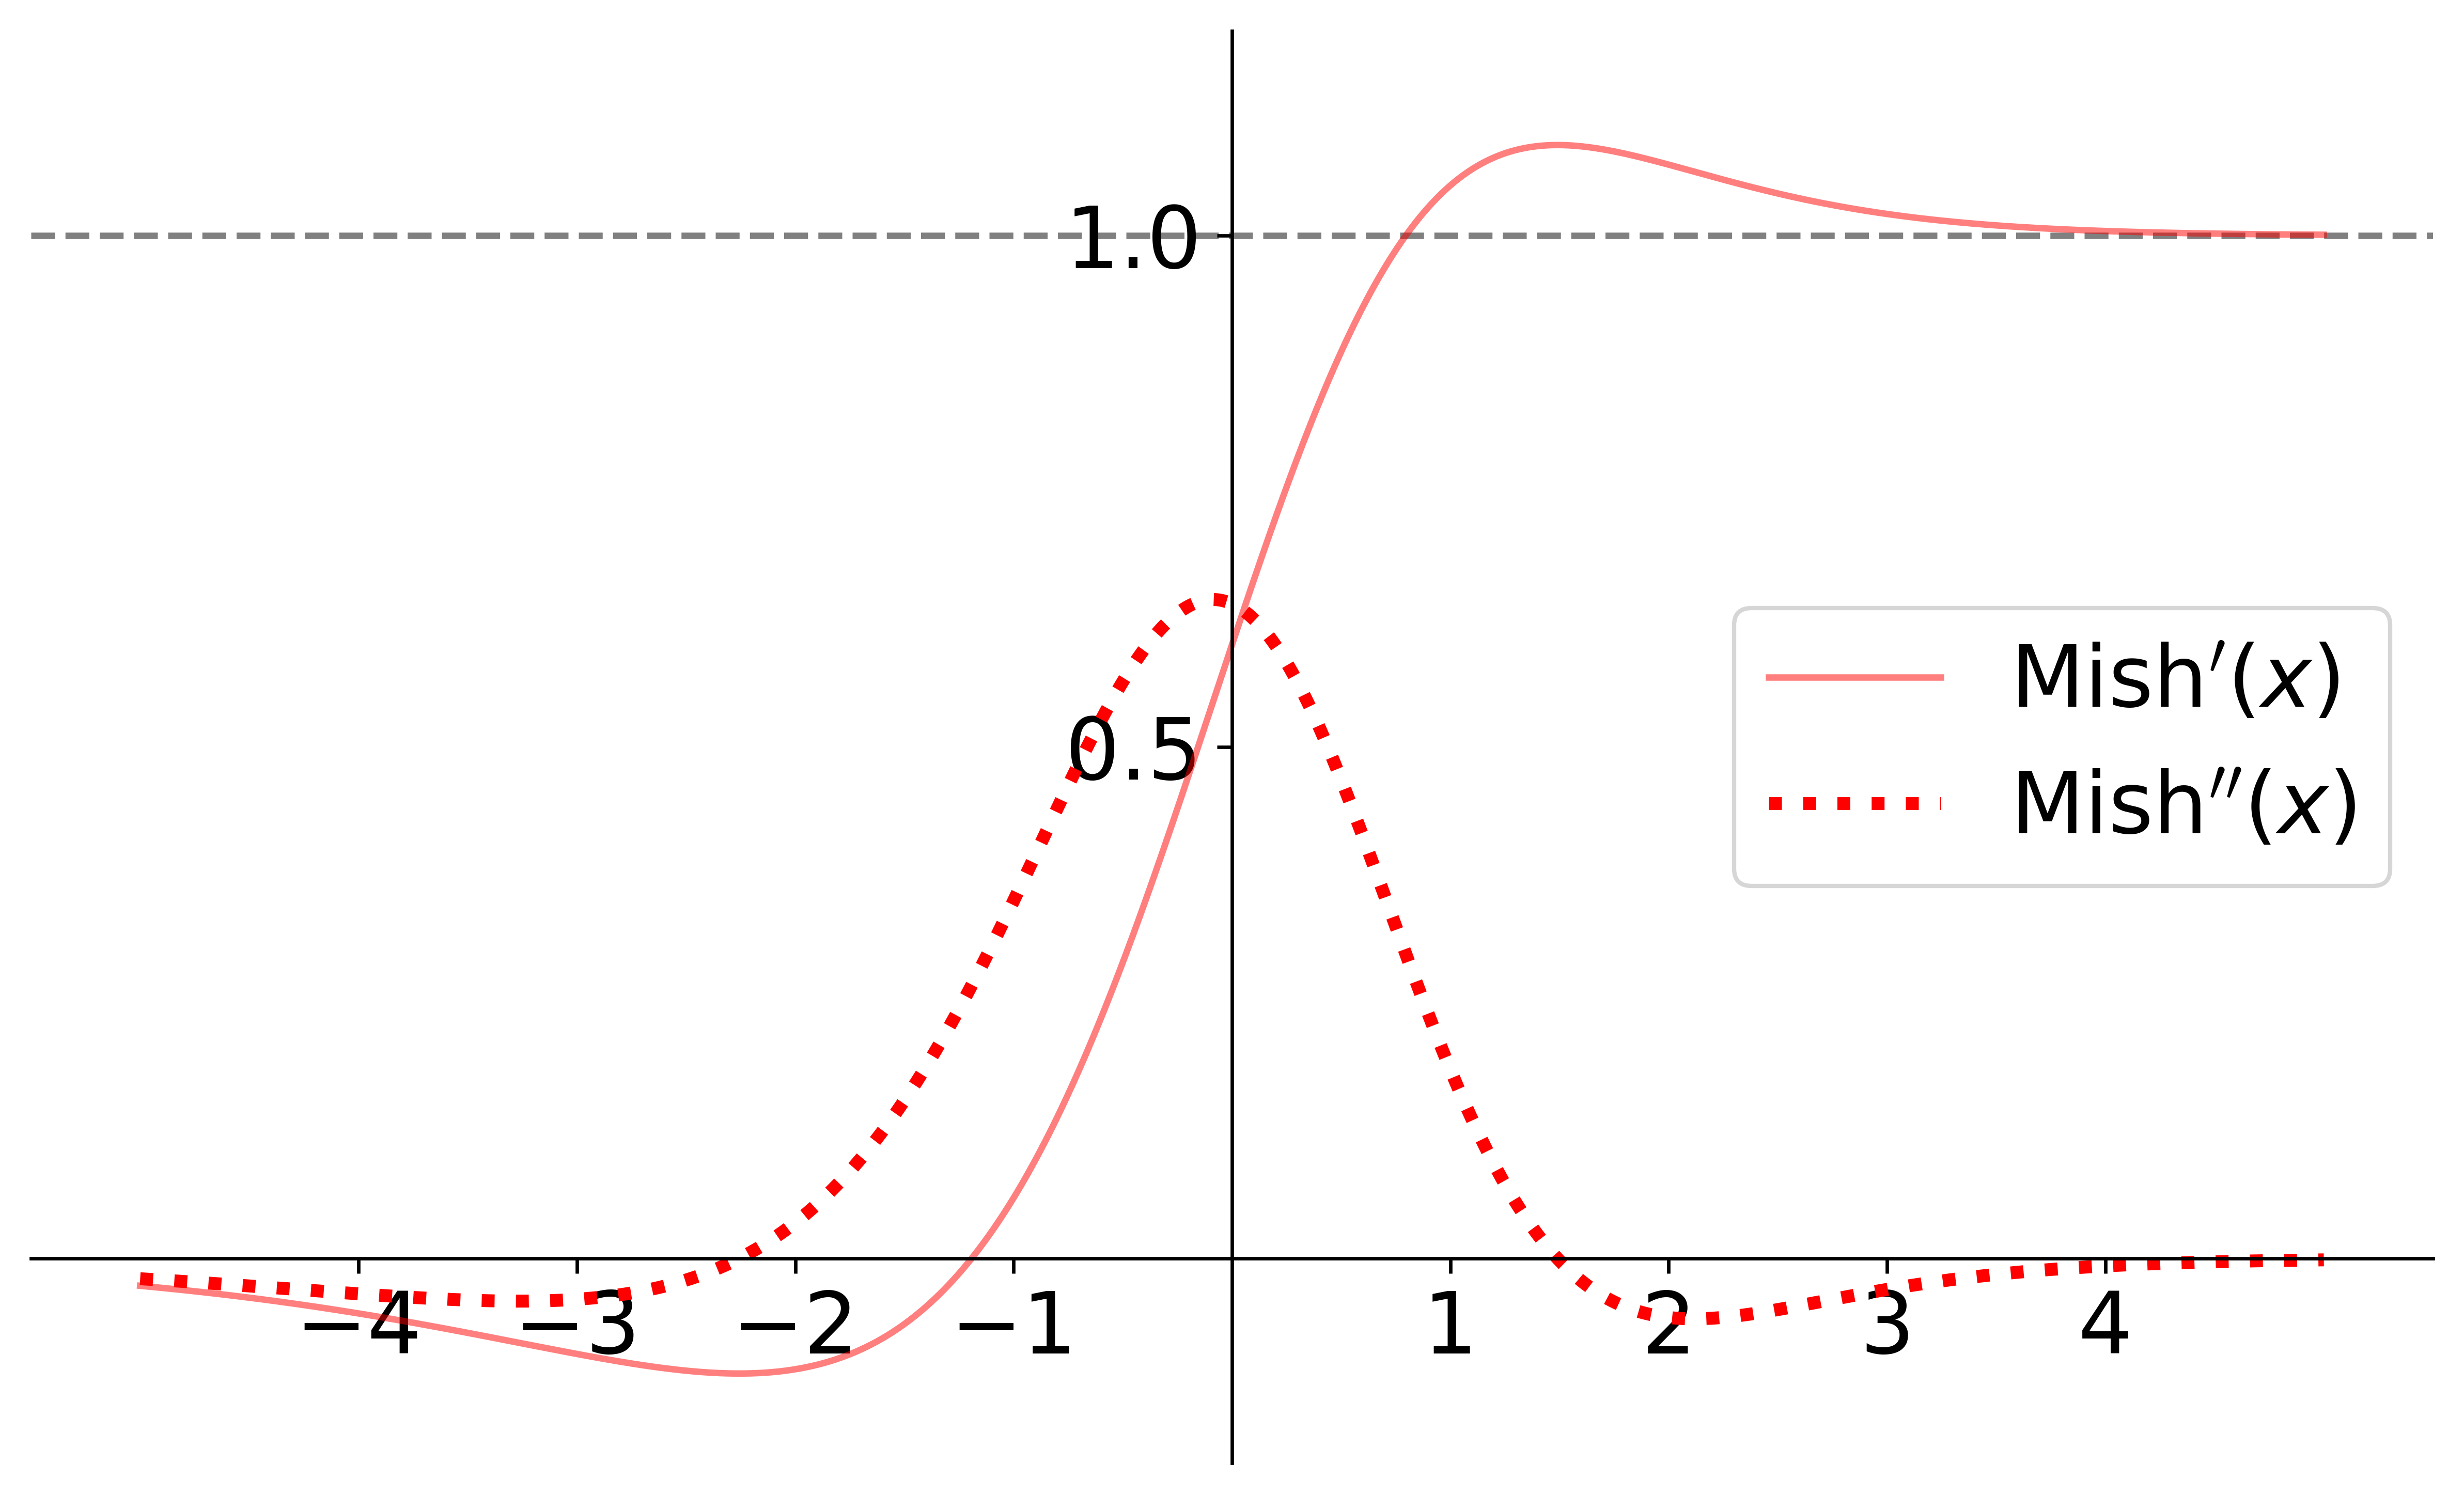

In [6]:
Image(filename='./experiment_logs/figures/lipmish_vs_lipswish/mish_derivatives.png', width=500) 

In [7]:
from scipy.optimize import fsolve

In [8]:
def softplus(x):
    return np.log(1+np.exp(x))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

mish_second_der = lambda x: 2*((1/np.cosh(softplus(x)))**2)*sigmoid(x) - \
            2*x*((1/np.cosh(softplus(x)))**2)*np.tanh(softplus(x))* \
            (sigmoid(x)**2) + x*((1/np.cosh(softplus(x)))**2)* \
            sigmoid(x)*(1-sigmoid(x))

results = fsolve(mish_second_der, [1.3, 1.8])
print(results)

[1.49057118 1.49057118]


In [9]:
mish_first_der = lambda x: np.tanh(softplus(x)) + \
            x*((1/np.cosh(softplus(x)))**2)*sigmoid(x)

print(round(mish_first_der(results[0]),3))

1.088


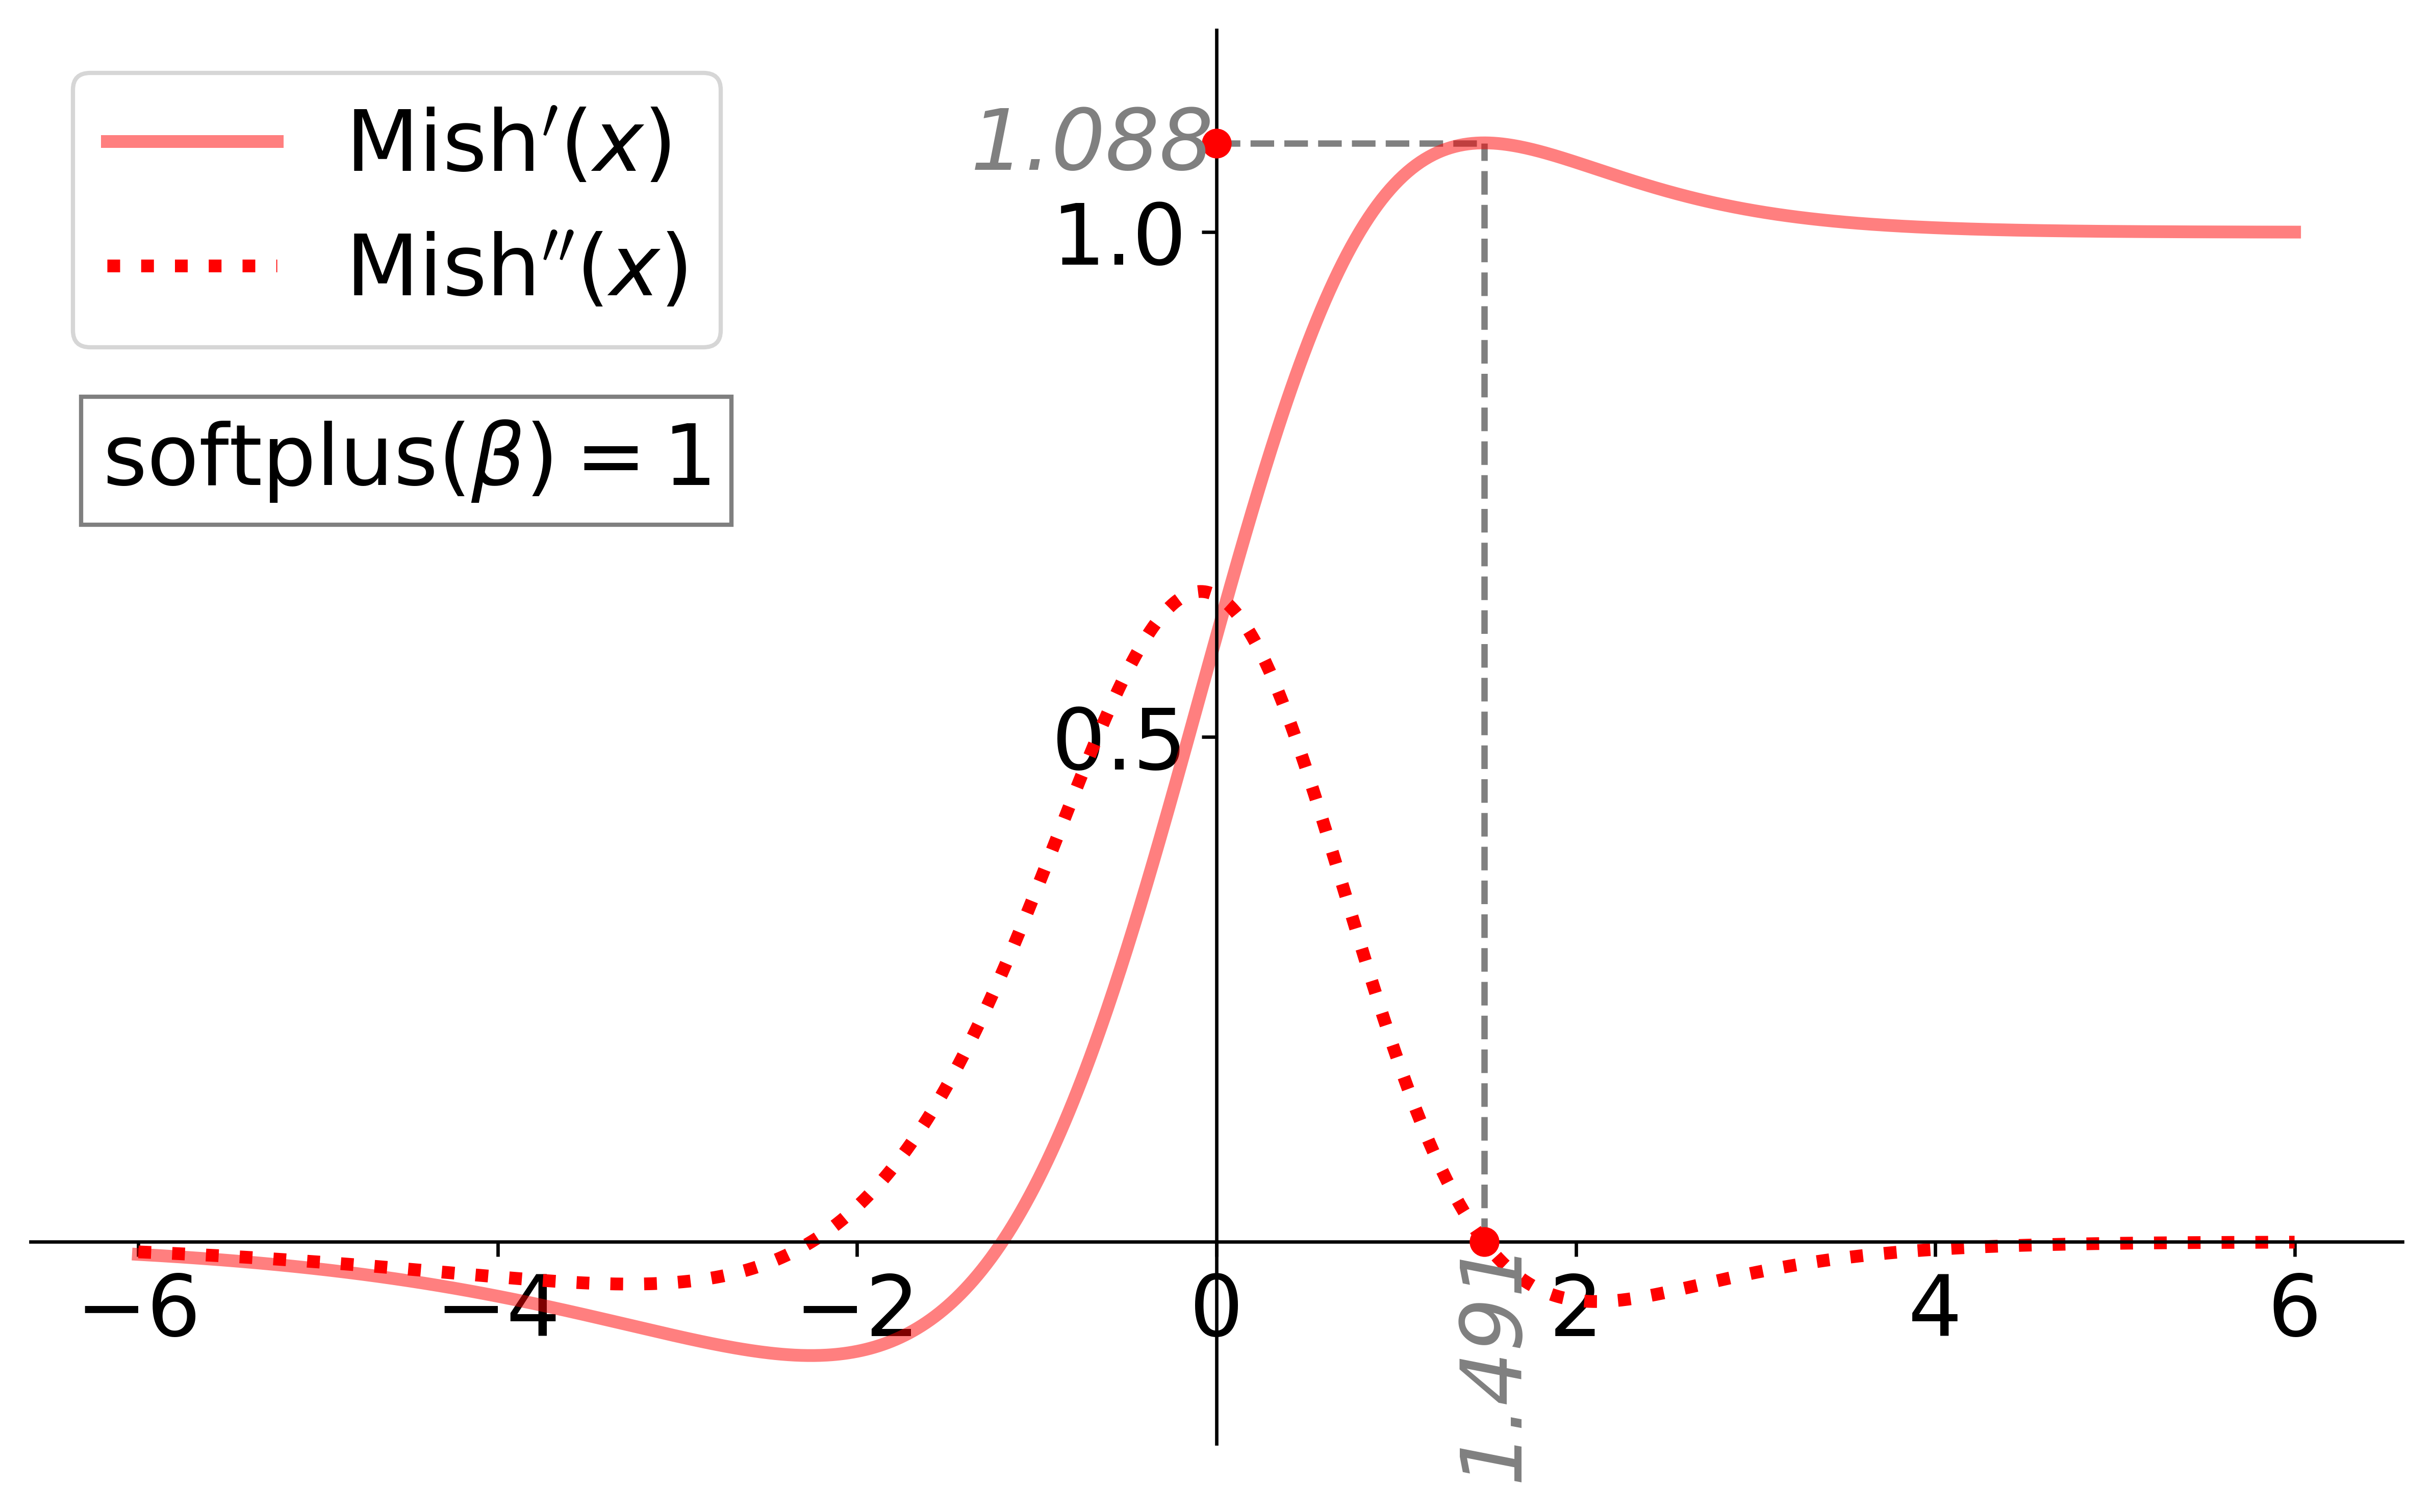

In [10]:
Image(filename='./experiment_logs/figures/lipmish_vs_lipswish/mish_derivatives_with_root.png', width=500) 

### Effect of $\beta$

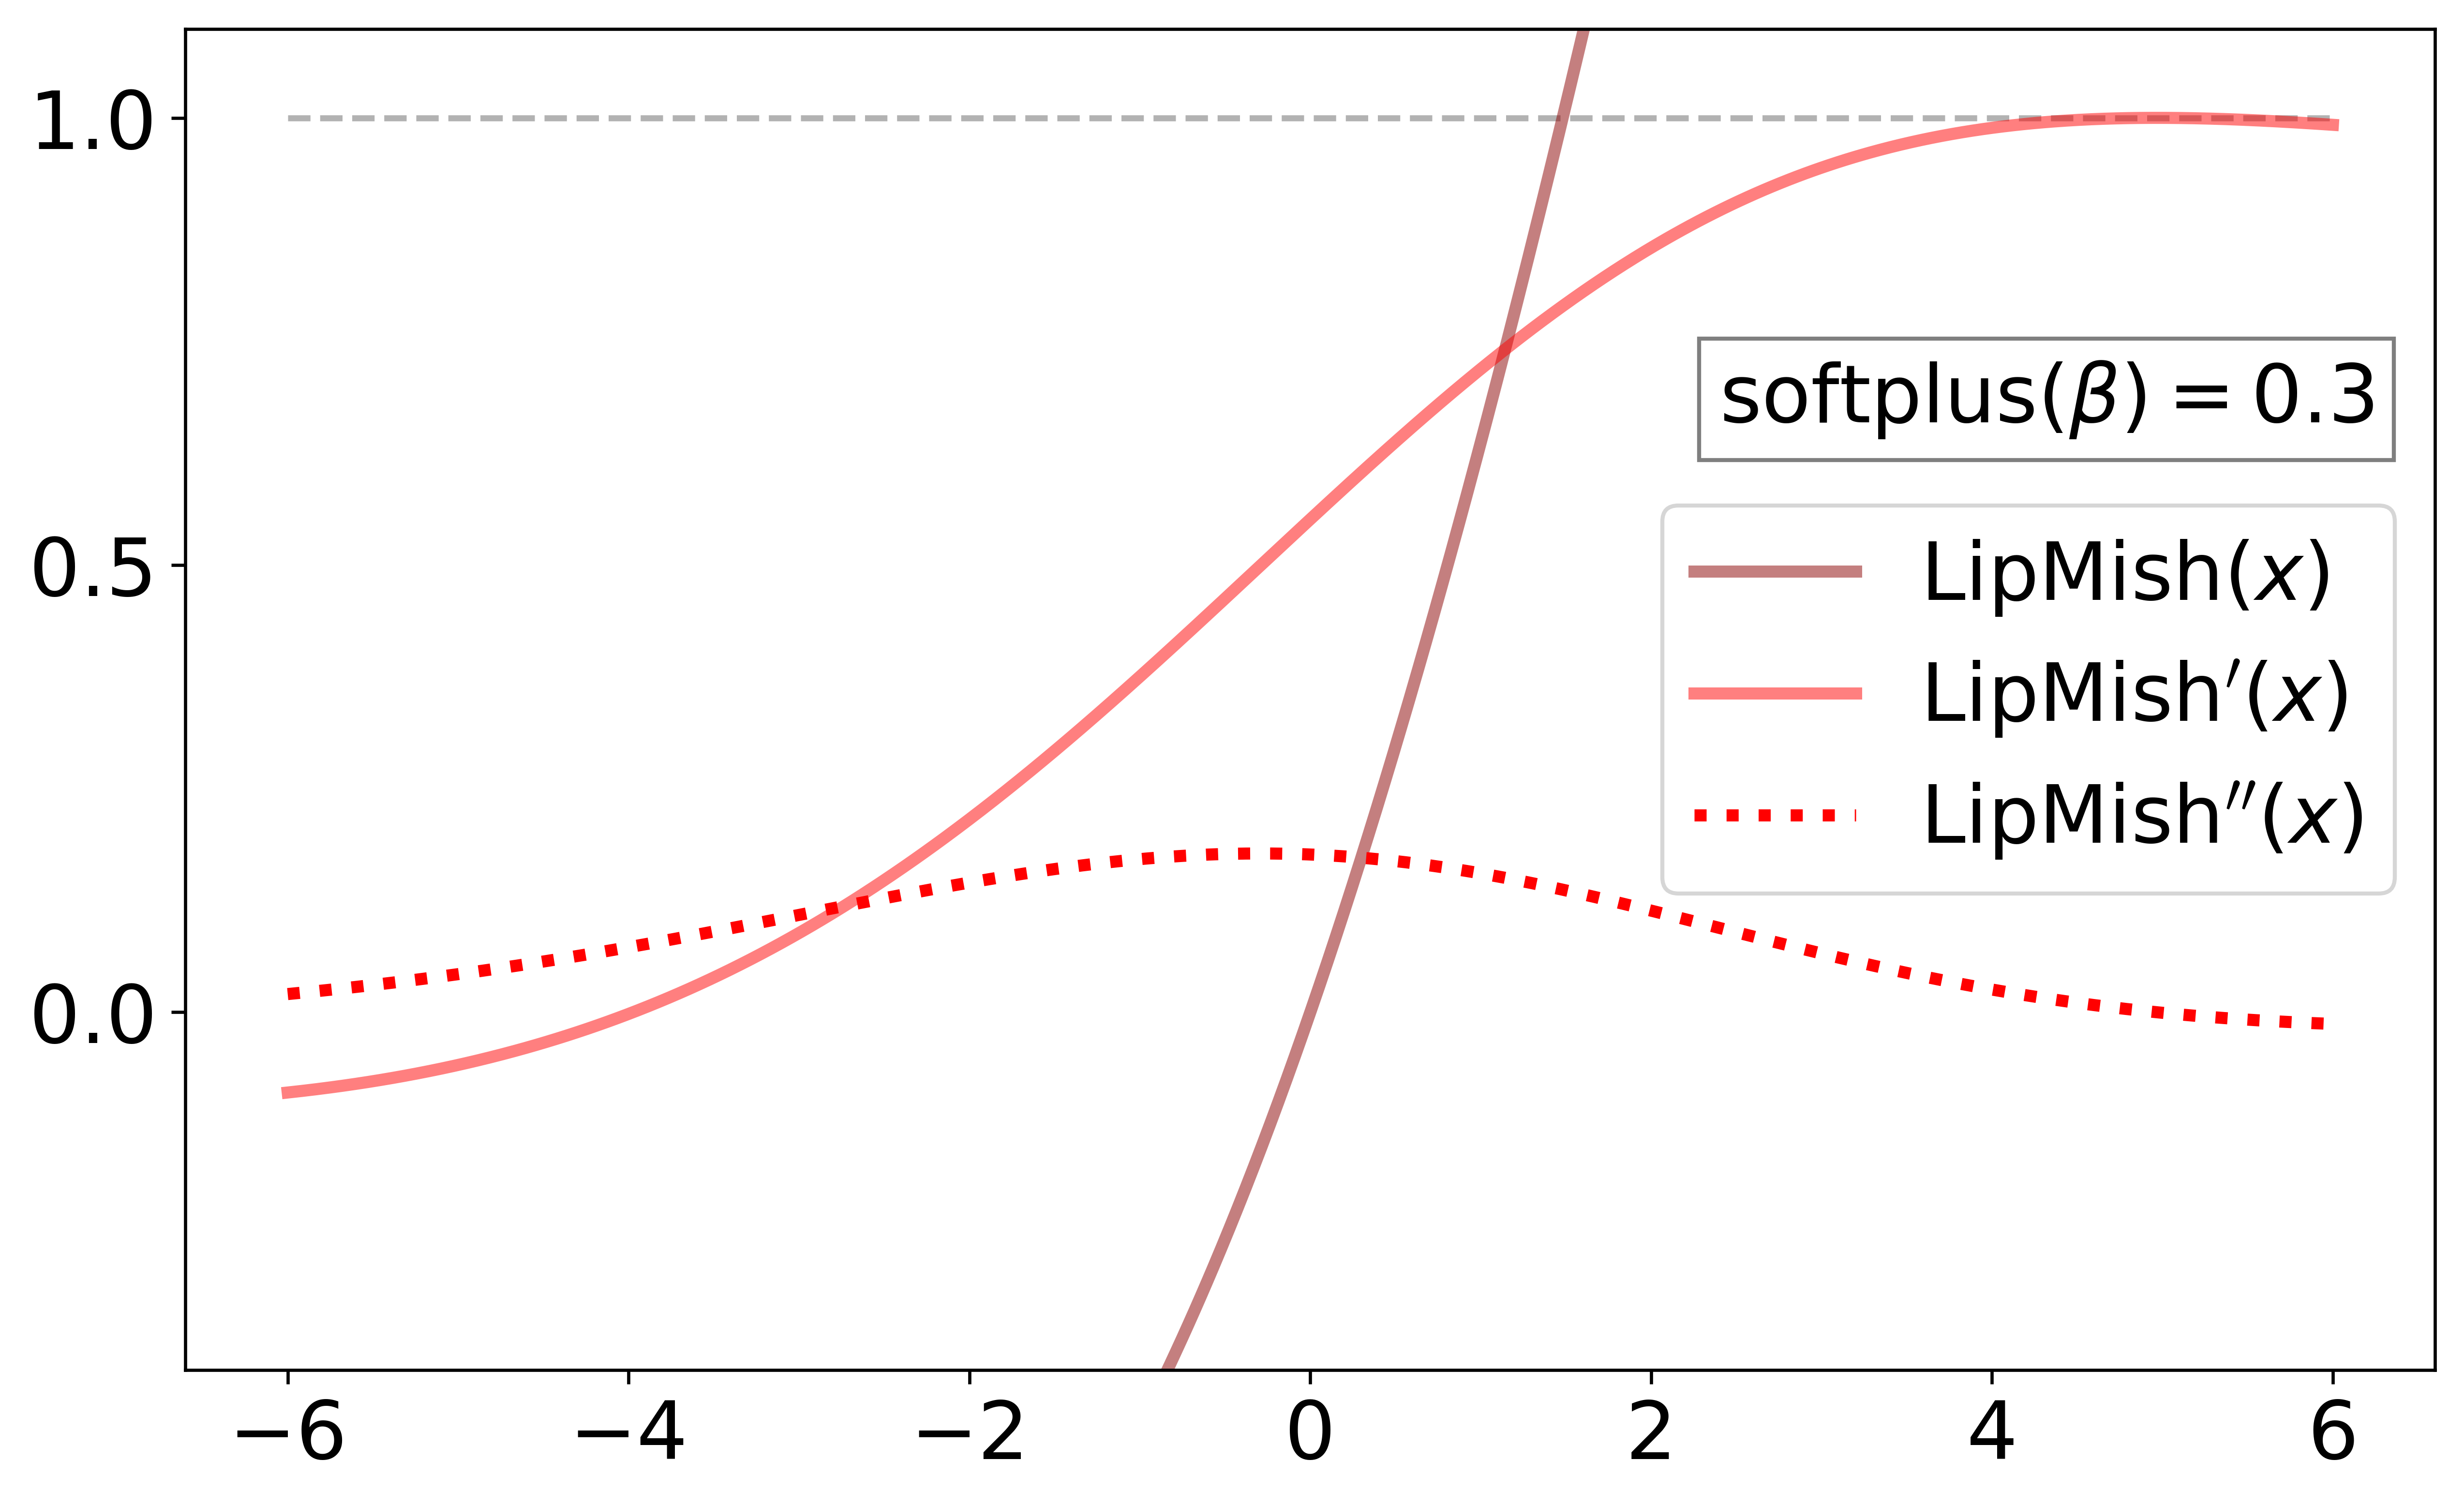

In [11]:
# softplus(beta) = 0.3
Image(filename='./experiment_logs/figures/lipmish_vs_lipswish/lipmish_betas1.png', width=500) 

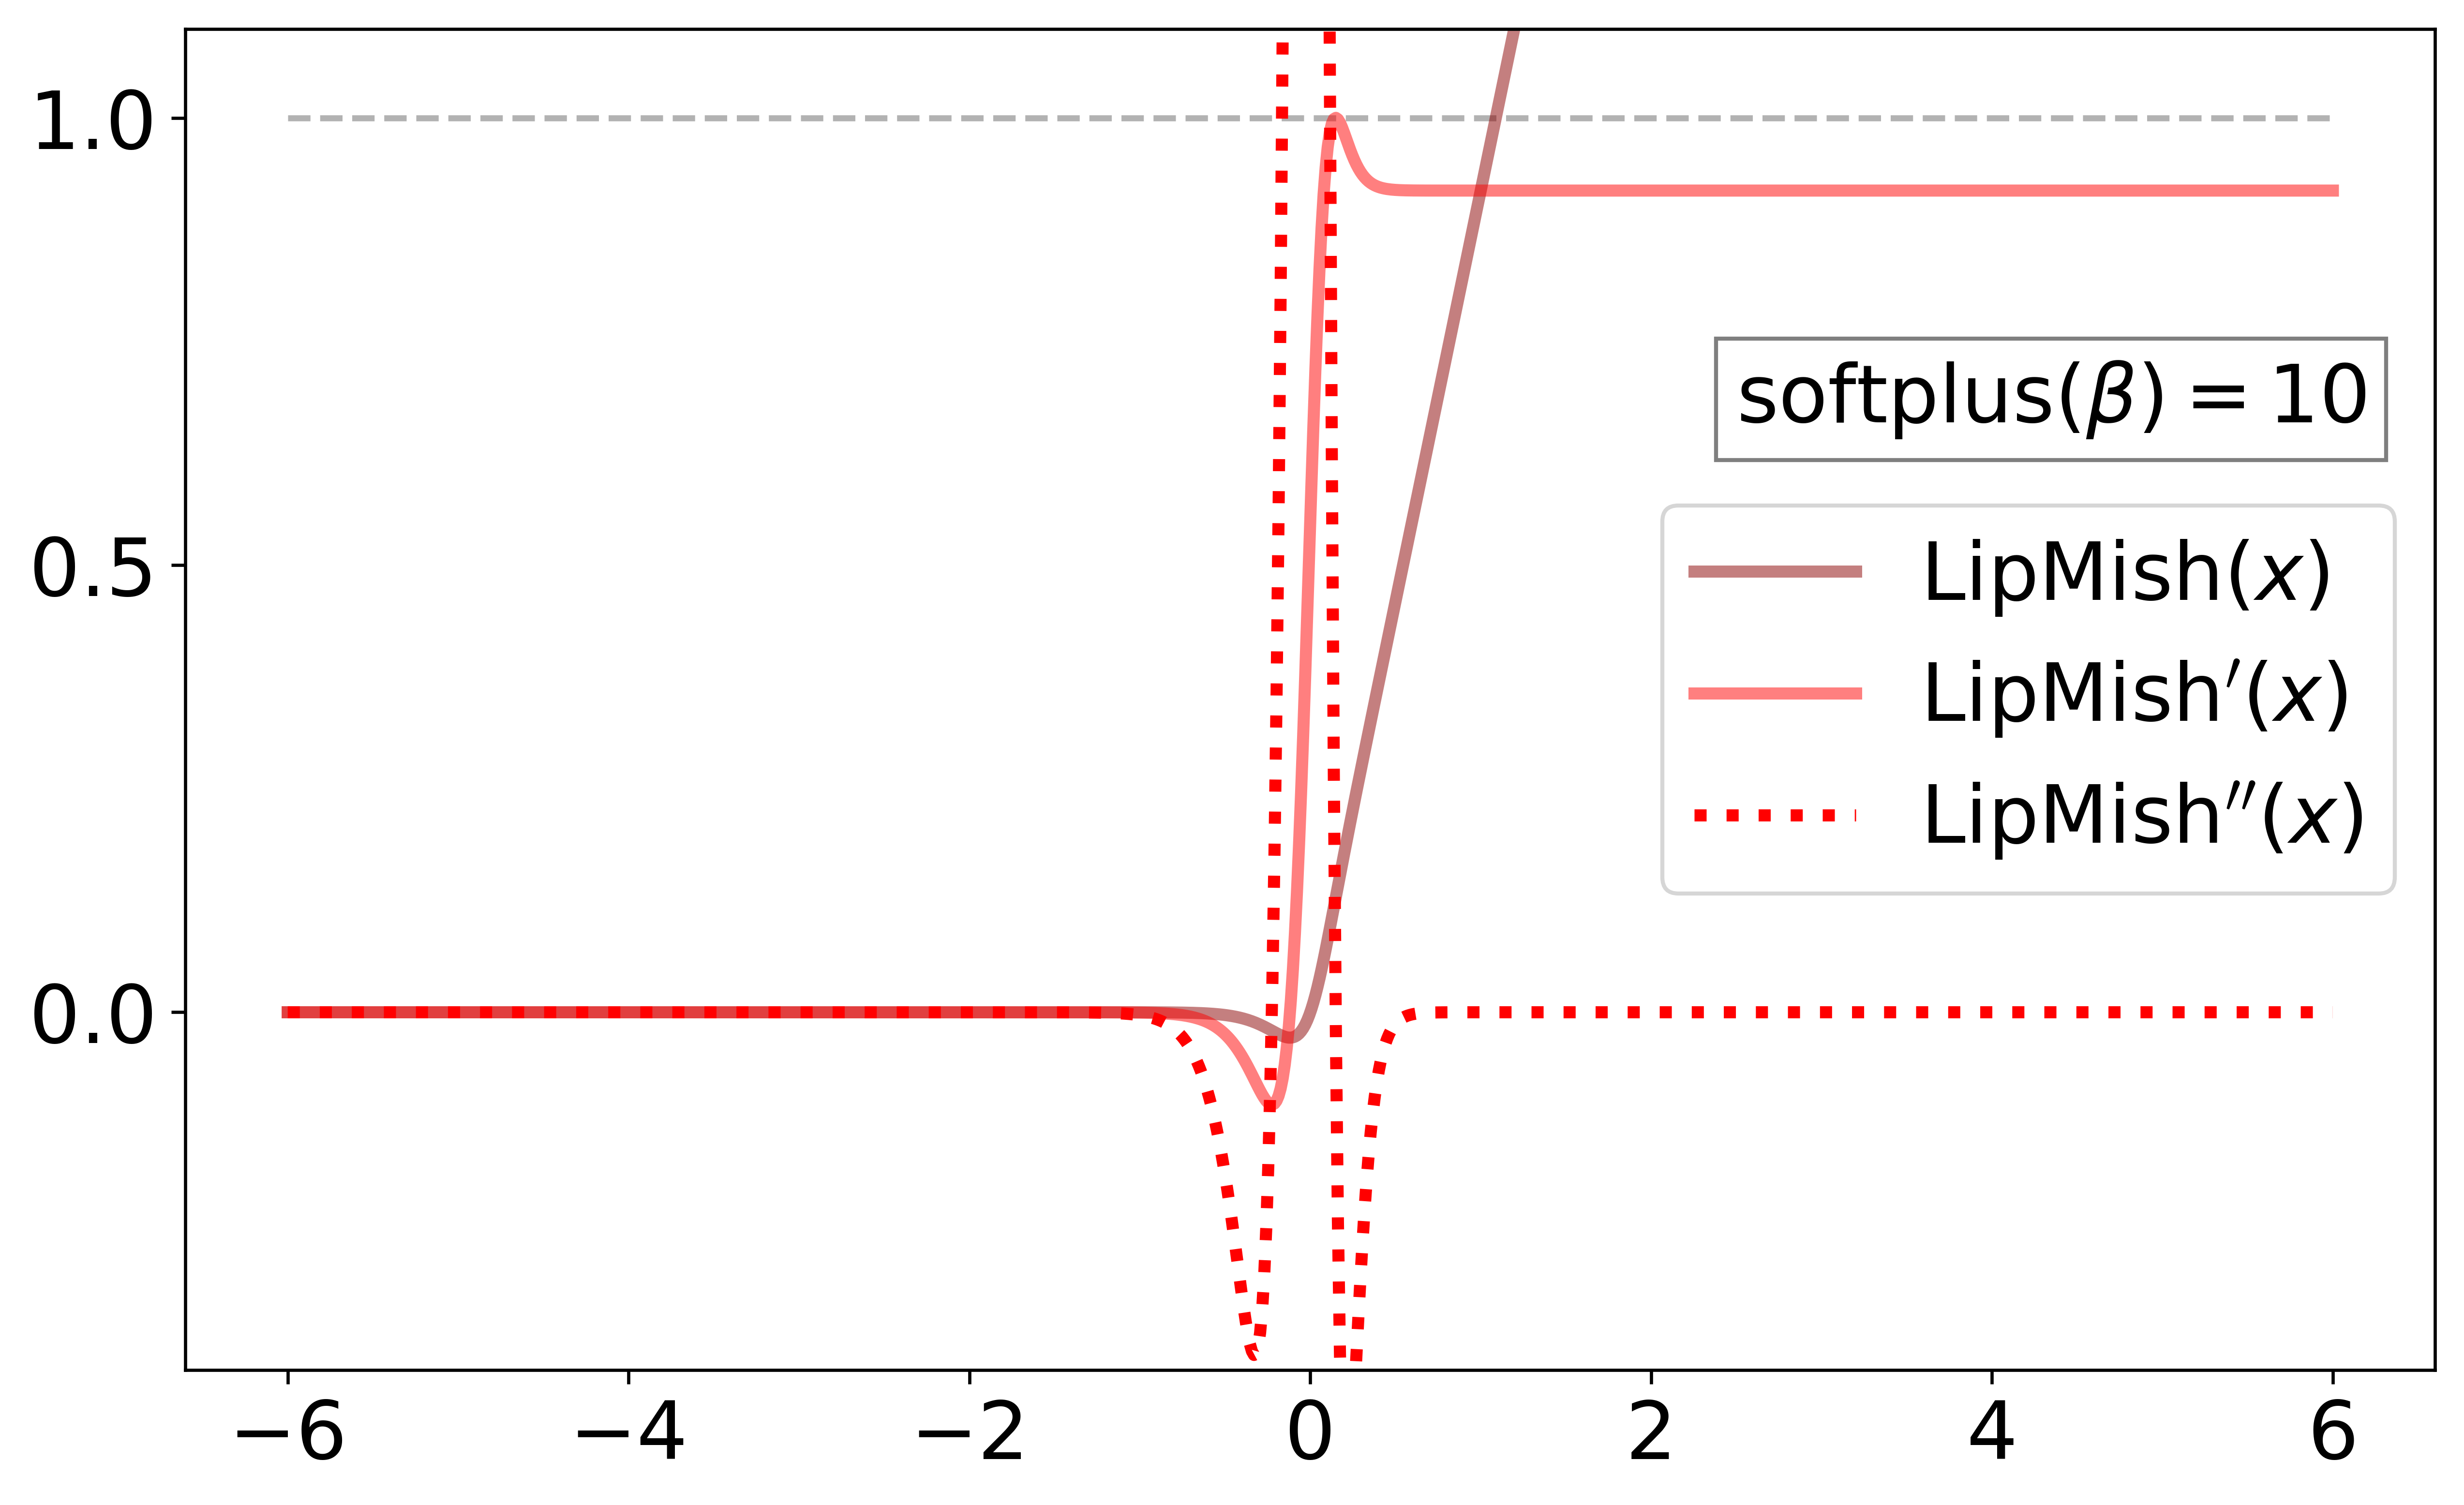

In [12]:
# softplus(beta) =10
Image(filename='./experiment_logs/figures/lipmish_vs_lipswish/lipmish_betas2.png', width=500) 

## Performance Comparison on Bayesian Network Datasets

### Increasing Flow Depth

Each residual block consists of a single hidden layer of 100 units. Learning rate of 1e-2.

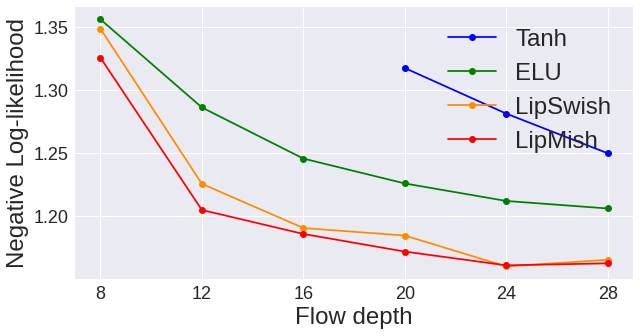

In [13]:
# Arithmetic Circuit dataset
lipswish_vs_lipmish_illustration.plot_depth(
    experiments={
        'Tanh': [
            (20, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_tanh_20_[100]'),
            (24, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_tanh_24_[100]'),
            (28, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_tanh_28_[100]'),
        ],
        'ELU': [
            (8, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_elu_8_[125]'),
            (12, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_elu_12_[100]'),
            (16, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_elu_16_[100]'),
            (20, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_elu_20_[100]'),
            (24, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_elu_24_[100]'),
            (28, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_elu_28_[100]'),
        ],
        'LipSwish': [
            (8, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipswish_8_[125]'),
            (12, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipswish_12_[100]'),
            (16, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipswish_16_[100]'),
            (20, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipswish_20_[100]'),
            (24, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipswish_24_[100]'),
            (28, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipswish_28_[100]')
        ],
        'LipMish': [
            (8, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipmish_8_[125]'),
            (12, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipmish_12_[100]'),
            (16, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipmish_16_[100]'),
            (20, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipmish_20_[100]'),
            (24, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipmish_24_[100]'),
            (28, 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipmish_28_[100]')
        ]
    },
    _config={'ylabel':'Negative Log-likelihood', 
             'xlabel':'Flow depth',
             'save_to': 'arithmetic-circuit-de-vs-flow-depth.png'}
)

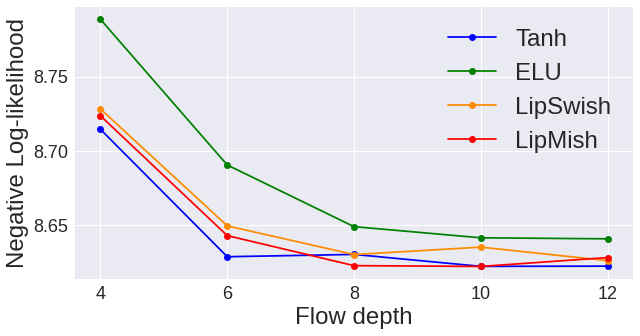

In [14]:
# Tree dataset
lipswish_vs_lipmish_illustration.plot_depth(
    experiments={
        'Tanh': [
            (4, 'residual_nf_density_estimation/tree/faithful_99_tanh_4_[100]'),
            (6, 'residual_nf_density_estimation/tree/faithful_99_tanh_6_[100]'),
            (8, 'residual_nf_density_estimation/tree/faithful_99_tanh_8_[100]'),
            (10, 'residual_nf_density_estimation/tree/faithful_99_tanh_10_[100]'),
            (12, 'residual_nf_density_estimation/tree/faithful_99_tanh_12_[100]'),
        ],
        'ELU': [
            (4, 'residual_nf_density_estimation/tree/faithful_99_elu_4_[100]'),
            (6, 'residual_nf_density_estimation/tree/faithful_99_elu_6_[100]'),
            (8, 'residual_nf_density_estimation/tree/faithful_99_elu_8_[100]'),
            (10, 'residual_nf_density_estimation/tree/faithful_99_elu_10_[100]'),
            (12, 'residual_nf_density_estimation/tree/faithful_99_elu_12_[100]')
        ],
        'LipSwish': [
            (4, 'residual_nf_density_estimation/tree/faithful_99_lipswish_4_[100]'),
            (6, 'residual_nf_density_estimation/tree/faithful_99_lipswish_6_[100]'),
            (8, 'residual_nf_density_estimation/tree/faithful_99_lipswish_8_[100]'),
            (10, 'residual_nf_density_estimation/tree/faithful_99_lipswish_10_[100]'),
            (12, 'residual_nf_density_estimation/tree/faithful_99_lipswish_12_[100]'),
        ],
        'LipMish': [
            (4, 'residual_nf_density_estimation/tree/faithful_99_lipmish_4_[100]'),
            (6, 'residual_nf_density_estimation/tree/faithful_99_lipmish_6_[100]'),
            (8, 'residual_nf_density_estimation/tree/faithful_99_lipmish_8_[100]'),
            (10, 'residual_nf_density_estimation/tree/faithful_99_lipmish_10_[100]'),
            (12, 'residual_nf_density_estimation/tree/faithful_99_lipmish_12_[100]'),
        ]
    },
    _config={'ylabel':'Negative Log-likelihood', 
             'xlabel':'Flow depth',
             'ylim': (8.61, 8.8),
             'xlim': (3.6, 12.2),
             'save_to': 'tree-de-vs-flow-depth.png'}
)

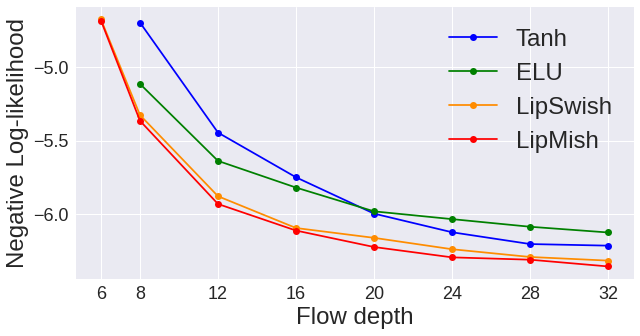

In [15]:
# Protein dataset
lipswish_vs_lipmish_illustration.plot_depth(
    experiments={
        'Tanh': [
            (8, 'residual_nf_density_estimation/protein/faithful_99_tanh_8_[100]'),
            (12, 'residual_nf_density_estimation/protein/faithful_99_tanh_12_[100]'),
            (16, 'residual_nf_density_estimation/protein/faithful_99_tanh_16_[100]'),
            (20, 'residual_nf_density_estimation/protein/faithful_99_tanh_20_[100]'),
            (24, 'residual_nf_density_estimation/protein/faithful_99_tanh_24_[100]'),
            (28, 'residual_nf_density_estimation/protein/faithful_99_tanh_28_[100]'),
            (32, 'residual_nf_density_estimation/protein/faithful_99_tanh_32_[100]'),
        ],
        'ELU': [
            (8, 'residual_nf_density_estimation/protein/faithful_99_elu_8_[100]'),
            (12, 'residual_nf_density_estimation/protein/faithful_99_elu_12_[100]'),
            (16, 'residual_nf_density_estimation/protein/faithful_99_elu_16_[100]'),
            (20, 'residual_nf_density_estimation/protein/faithful_99_elu_20_[100]'),
            (24, 'residual_nf_density_estimation/protein/faithful_99_elu_24_[100]'),
            (28, 'residual_nf_density_estimation/protein/faithful_99_elu_28_[100]'),
            (32, 'residual_nf_density_estimation/protein/faithful_99_elu_32_[100]'),
        ],
        'LipSwish': [
            (6, 'residual_nf_density_estimation/protein/faithful_99_lipswish_6_[100]'),
            (8, 'residual_nf_density_estimation/protein/faithful_99_lipswish_8_[100]'),
            (12, 'residual_nf_density_estimation/protein/faithful_99_lipswish_12_[100]'),
            (16, 'residual_nf_density_estimation/protein/faithful_99_lipswish_16_[100]'),
            (20, 'residual_nf_density_estimation/protein/faithful_99_lipswish_20_[100]'),
            (24, 'residual_nf_density_estimation/protein/faithful_99_lipswish_24_[100]'),
            (28, 'residual_nf_density_estimation/protein/faithful_99_lipswish_28_[100]'),
            (32, 'residual_nf_density_estimation/protein/faithful_99_lipswish_32_[100]'),
        ],
        'LipMish': [
            (6, 'residual_nf_density_estimation/protein/faithful_99_lipmish_6_[100]'),
            (8, 'residual_nf_density_estimation/protein/faithful_99_lipmish_8_[100]'),
            (12, 'residual_nf_density_estimation/protein/faithful_99_lipmish_12_[100]'),
            (16, 'residual_nf_density_estimation/protein/faithful_99_lipmish_16_[100]'),
            (20, 'residual_nf_density_estimation/protein/faithful_99_lipmish_20_[100]'),
            (24, 'residual_nf_density_estimation/protein/faithful_99_lipmish_24_[100]'),
            (28, 'residual_nf_density_estimation/protein/faithful_99_lipmish_28_[100]'),
            (32, 'residual_nf_density_estimation/protein/faithful_99_lipmish_32_[100]'),
        ]
    },
    _config={'ylabel':'Negative Log-likelihood', 
             'xlabel':'Flow depth',
             'save_to':'protein-de-vs-flow-depth.png'}
)

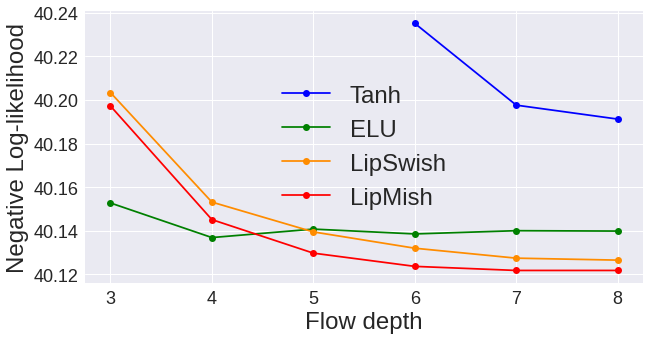

In [16]:
# EColi70 (Alternative) dataset
lipswish_vs_lipmish_illustration.plot_depth(
    experiments={
        'Tanh': [
            (6, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_tanh_6_[100]'),
            (7, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_tanh_7_[100]'),
            (8, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_tanh_8_[100]')
        ],
        'ELU': [
            (3, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_elu_3_[100]'),
            (4, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_elu_4_[100]'),
            (5, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_elu_5_[100]'),
            (6, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_elu_6_[100]'),
            (7, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_elu_7_[100]'),
            (8, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_elu_8_[100]')
        ],
        'LipSwish': [
            (3, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipswish_3_[100]'),
            (4, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipswish_4_[100]'),
            (5, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipswish_5_[100]'),
            (6, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipswish_6_[100]'),
            (7, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipswish_7_[100]'),
            (8, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipswish_8_[100]')
        ],
        'LipMish': [
            (3, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipmish_3_[100]'),
            (4, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipmish_4_[100]'),
            (5, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipmish_5_[100]'),
            (6, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipmish_6_[100]'),
            (7, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipmish_8_[100]'),
            (8, 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipmish_8_[100]')
        ]
    },
    _config={'ylabel':'Negative Log-likelihood', 
             'xlabel':'Flow depth',
             'ylim':(40.12, 40.24),
             'xlim':(2.8, 8.2),
             'save_to': 'ecoli70-alt-de-vs-flow-depth.png'}
)

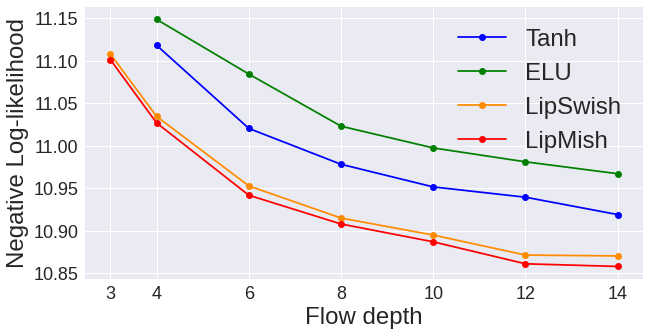

In [17]:
# Mehra dataset
lipswish_vs_lipmish_illustration.plot_depth(
    experiments={
        'Tanh': [
            (4, 'residual_nf_density_estimation/mehra-real/faithful_99_tanh_4_[100]'),
            (6, 'residual_nf_density_estimation/mehra-real/faithful_99_tanh_6_[100]'),
            (8, 'residual_nf_density_estimation/mehra-real/faithful_99_tanh_8_[100]'),
            (10, 'residual_nf_density_estimation/mehra-real/faithful_99_tanh_10_[100]'),
            (12, 'residual_nf_density_estimation/mehra-real/faithful_99_tanh_12_[100]'),
            (14, 'residual_nf_density_estimation/mehra-real/faithful_99_tanh_14_[100]')
# 
        ],
        'ELU': [
            (4, 'residual_nf_density_estimation/mehra-real/faithful_99_elu_4_[100]'),
            (6, 'residual_nf_density_estimation/mehra-real/faithful_99_elu_6_[100]'),
            (8, 'residual_nf_density_estimation/mehra-real/faithful_99_elu_8_[100]'),
            (10, 'residual_nf_density_estimation/mehra-real/faithful_99_elu_10_[100]'),
            (12, 'residual_nf_density_estimation/mehra-real/faithful_99_elu_12_[100]'),
            (14, 'residual_nf_density_estimation/mehra-real/faithful_99_elu_14_[100]')
        ],
        'LipSwish': [
            (3, 'residual_nf_density_estimation/mehra-real/faithful_99_lipswish_3_[100]'),
            (4, 'residual_nf_density_estimation/mehra-real/faithful_99_lipswish_4_[100]'),
            (6, 'residual_nf_density_estimation/mehra-real/faithful_99_lipswish_6_[100]'),
            (8, 'residual_nf_density_estimation/mehra-real/faithful_99_lipswish_8_[100]'),
            (10, 'residual_nf_density_estimation/mehra-real/faithful_99_lipswish_10_[100]'),
            (12, 'residual_nf_density_estimation/mehra-real/faithful_99_lipswish_12_[100]'),
            (14, 'residual_nf_density_estimation/mehra-real/faithful_99_lipswish_14_[100]')
        ],
        'LipMish': [
            (3, 'residual_nf_density_estimation/mehra-real/faithful_99_lipmish_3_[100]'),
            (4, 'residual_nf_density_estimation/mehra-real/faithful_99_lipmish_4_[100]'),
            (6, 'residual_nf_density_estimation/mehra-real/faithful_99_lipmish_6_[100]'),
            (8, 'residual_nf_density_estimation/mehra-real/faithful_99_lipmish_8_[100]'),
            (10, 'residual_nf_density_estimation/mehra-real/faithful_99_lipmish_10_[100]'),
            (12, 'residual_nf_density_estimation/mehra-real/faithful_99_lipmish_12_[100]'),
            (14, 'residual_nf_density_estimation/mehra-real/faithful_99_lipmish_14_[100]')
        ]
    },
    _config={'ylabel':'Negative Log-likelihood', 
             'xlabel':'Flow depth',
             'save_to': 'mehra-real-de-vs-flow-depth.png'}
)

### LipMish vs LipSwish Density Estimation Performance for GRF models used in Flow Comparison Investigation

**Arithmetic Circuit**

In [18]:
# Small model
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipmish_8_[125]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipswish_8_[125]/')
]
_, _, testloader = load_dataset('arithmetic-circuit', 5000, double=True)
results = print_nll(next(iter(testloader)), ArithmeticCircuit(), experiments, device)

Num test samples: 5000
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | 1.248 (0.012) |
+----------------+---------------+
| GRF w LipSwish | 1.270 (0.027) |
+----------------+---------------+


In [19]:
# Large model 
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipmish_17_[200]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/arithmetic-circuit/faithful_99_lipswish_17_[200]/')
]
_, _, testloader = load_dataset('arithmetic-circuit', 5000, double=True)
results = print_nll(next(iter(testloader)), ArithmeticCircuit(), experiments, device)

Num test samples: 5000
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | 1.110 (0.010) |
+----------------+---------------+
| GRF w LipSwish | 1.107 (0.006) |
+----------------+---------------+


**Tree**

In [20]:
# Small
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/tree/faithful_99_lipmish_8_[100]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/tree/faithful_99_lipswish_8_[100]/')
]
_, _, testloader = load_dataset('tree', 5000, double=True)
results = print_nll(next(iter(testloader)), Tree(device), experiments, device)

Num test samples: 5000
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | 8.642 (0.005) |
+----------------+---------------+
| GRF w LipSwish | 8.649 (0.004) |
+----------------+---------------+


In [21]:
# Large
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/tree/faithful_99_lipmish_15_[215]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/tree/faithful_99_lipswish_15_[215]/')
]
_, _, testloader = load_dataset('tree', 5000, double=True)
results = print_nll(next(iter(testloader)), Tree(device), experiments, device)

Num test samples: 5000
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | 8.645 (0.002) |
+----------------+---------------+
| GRF w LipSwish | 8.649 (0.001) |
+----------------+---------------+


**Protein**

In [22]:
# Small
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/protein/faithful_99_lipmish_9_[100]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/protein/faithful_99_lipswish_9_[100]/')
]
_, _, testloader = load_protein(100, device, double=True)
results = print_nll(next(iter(testloader)), Protein(), experiments, "cpu")

Num test samples: 1672
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | -5.259 (0.011) |
+----------------+---------------+
| GRF w LipSwish | -5.224 (0.016) |
+----------------+---------------+


In [23]:
# Large
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/protein/faithful_99_lipmish_28_[100]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/protein/faithful_99_lipswish_28_[100]/')
]
_, _, testloader = load_protein(100, device, double=True)
results = print_nll(next(iter(testloader)), Protein(), experiments, "cpu")

Num test samples: 1672
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | -6.111 (0.013) |
+----------------+---------------+
| GRF w LipSwish | -6.035 (0.068) |
+----------------+---------------+


**EColi**

In [24]:
# Small
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipmish_8_[100]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipswish_8_[100]/')
]
_, _, testloader = load_dataset('ecoli70-alt', 5000, double=True)
results = print_nll(next(iter(testloader)), EColi70Adapted(), experiments, "cpu")

Num test samples: 5000
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | 40.059 (0.003) |
+----------------+---------------+
| GRF w LipSwish | 40.062 (0.003) |
+----------------+---------------+


In [25]:
# Large
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipmish_16_[100]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/ecoli70-alt/faithful_99_lipswish_16_[100]/')
]
_, _, testloader = load_dataset('ecoli70-alt', 5000, double=True)
results = print_nll(next(iter(testloader)), EColi70Adapted(), experiments, "cpu")

Num test samples: 5000
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | 40.062 (0.002) |
+----------------+---------------+
| GRF w LipSwish | 40.064 (0.003) |
+----------------+---------------+


**Mehra**

In [26]:
# Small
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/mehra-real/faithful_99_lipmish_9_[125]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/mehra-real/faithful_99_lipswish_9_[125]/')
]
_, _, testloader = load_mehra(device, double=False)
results = print_nll(next(iter(testloader)), Mehra(), experiments, "cpu")

Num test samples: 1885
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | 11.660 (0.017) |
+----------------+---------------+
| GRF w LipSwish | 11.665 (0.012) |
+----------------+---------------+


In [27]:
# Large
experiments = [
    ('GRF w LipMish', 'residual_nf_density_estimation/mehra-real/faithful_99_lipmish_17_[200]/'),
    ('GRF w LipSwish', 'residual_nf_density_estimation/mehra-real/faithful_99_lipswish_17_[200]/')
]
_, _, testloader = load_mehra(device, double=True)
results = print_nll(next(iter(testloader)), Mehra(), experiments, "cpu")

Num test samples: 1885
+----------------+---------------+
| Model          | Avg NLL (std) |
+----------------+---------------+
| GRF w LipMish  | 11.612 (0.031) |
+----------------+---------------+
| GRF w LipSwish | 11.623 (0.035) |
+----------------+---------------+


### LipMish vs LipSwish Inference Performance for GRF models used in Flow Comparison Investigation

**Arithmetic Circuit**

In [28]:
# Small
experiments = [
    ('GRF w LipMish', 'residual_nf/arithmetic-circuit/faithful_99_lipmish_8_[125]/'),
    ('GRF w LipSwish', 'residual_nf/arithmetic-circuit/faithful_99_lipswish_8_[125]/')
]
_, _, testloader = load_dataset('arithmetic-circuit', 5000, double=True)
results = print_reverse_kl(next(iter(testloader)), ArithmeticCircuit(), experiments, device)

Num test samples: 5000
+----------------+----------------------+
| Model          | Avg Reverse KL (std) |
+----------------+----------------------+
| GRF w LipMish  | 4.194 (0.189)        |
+----------------+----------------------+
| GRF w LipSwish | 4.219 (0.180)        |
+----------------+----------------------+


In [29]:
# Large
experiments = [
    ('GRF w LipMish', 'residual_nf/arithmetic-circuit/faithful_99_lipmish_17_[200]/'),
    ('GRF w LipSwish', 'residual_nf/arithmetic-circuit/faithful_99_lipswish_17_[200]/')
]
_, _, testloader = load_dataset('arithmetic-circuit', 5000, double=True)
results = print_reverse_kl(next(iter(testloader)), ArithmeticCircuit(), experiments, device)

Num test samples: 5000
+----------------+----------------------+
| Model          | Avg Reverse KL (std) |
+----------------+----------------------+
| GRF w LipMish  | 3.713 (0.135)        |
+----------------+----------------------+
| GRF w LipSwish | 3.766 (0.123)        |
+----------------+----------------------+


**Tree**

In [30]:
# Small
experiments = [
    ('GRF w LipMish', 'residual_nf/tree/faithful_99_lipmish_8_[125]/'),
    ('GRF w LipSwish', 'residual_nf/tree/faithful_99_lipswish_8_[125]/')
]
_, _, testloader = load_dataset('tree', 5000, double=True)
results = print_reverse_kl(next(iter(testloader)), Tree('cpu',double=True), experiments, 'cpu')

Num test samples: 5000
+----------------+----------------------+
| Model          | Avg Reverse KL (std) |
+----------------+----------------------+
| GRF w LipMish  | 1.738 (0.004)        |
+----------------+----------------------+
| GRF w LipSwish | 1.739 (0.002)        |
+----------------+----------------------+


In [31]:
# Large
experiments = [
    ('GRF w LipMish', 'residual_nf/tree/faithful_99_lipmish_15_[215]/'),
    ('GRF w LipSwish', 'residual_nf/tree/faithful_99_lipswish_15_[215]/')
]
_, _, testloader = load_dataset('tree', 5000, double=True)
results = print_reverse_kl(next(iter(testloader)), Tree(device), experiments, device)

Num test samples: 5000
+----------------+----------------------+
| Model          | Avg Reverse KL (std) |
+----------------+----------------------+
| GRF w LipMish  | 1.705 (0.004)        |
+----------------+----------------------+
| GRF w LipSwish | 1.705 (0.003)        |
+----------------+----------------------+


**EColi**

In [32]:
# Small
experiments = [
    ('GRF w LipMish', 'residual_nf/ecoli70-alt/faithful_99_lipmish_9_[100]/'),
    ('GRF w LipSwish', 'residual_nf/ecoli70-alt/faithful_99_lipswish_9_[100]/')
]
_, _, testloader = load_dataset('ecoli70-alt', 5000, double=True)
results = print_reverse_kl(next(iter(testloader)), EColi70Adapted(), experiments, "cpu")

Num test samples: 5000
+----------------+----------------------+
| Model          | Avg Reverse KL (std) |
+----------------+----------------------+
| GRF w LipMish  | 34.964 (0.001)       |
+----------------+----------------------+
| GRF w LipSwish | 34.986 (0.043)       |
+----------------+----------------------+


In [33]:
# Large
experiments = [
    ('GRF w LipMish', 'residual_nf/ecoli70-alt/faithful_99_lipmish_16_[200]/'),
    ('GRF w LipSwish', 'residual_nf/ecoli70-alt/faithful_99_lipswish_16_[200]/')
]
_, _, testloader = load_dataset('ecoli70-alt', 5000, double=True)
results = print_reverse_kl(next(iter(testloader)), EColi70Adapted(), experiments, "cpu")

Num test samples: 5000
+----------------+----------------------+
| Model          | Avg Reverse KL (std) |
+----------------+----------------------+
| GRF w LipMish  | 34.963 (0.001)       |
+----------------+----------------------+
| GRF w LipSwish | 34.962 (0.001)       |
+----------------+----------------------+
